### 加载数据

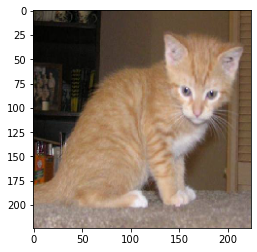

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = "D:/project/dataset/cat_and_dog/1.jpg"
img = load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

img = img_to_array(img)

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print(x.shape)

(1, 224, 224, 3)


In [3]:
features = model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [4]:
features = features.reshape(1, -1)
print(features.shape)

(1, 25088)


In [5]:
%%time

model_vgg = VGG16(weights='imagenet', include_top=False)

def model_process(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1, 25088)
    return x_vgg

import os
folder = "D:/project/dataset/cat_and_dog/test_set/cats"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == '.jpg':
        img_path.append(i)
img_path = [folder + "//" + i for i in img_path]

features1 = np.zeros([len(img_path), 25088])
for i in range(len(img_path)):
    feature_i = model_process(img_path[i], model_vgg)
#     print('preprocessed: ', img_path[i])
    features1[i] = feature_i
    
folder = "D:/project/dataset/cat_and_dog/test_set/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == '.jpg':
        img_path.append(i)
img_path = [folder + "//" + i for i in img_path]

features2 = np.zeros([len(img_path), 25088])
for i in range(len(img_path)):
    feature_i = model_process(img_path[i], model_vgg)
#     print('preprocessed: ', img_path[i])
    features2[i] = feature_i
    
print(features1.shape, features2.shape)
y1 = np.zeros(1011)
y2 = np.ones(1012)

X = np.concatenate((features1, features2), axis=0)
y = np.concatenate((y1, y2), axis=0)
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(1011, 25088) (1012, 25088)
(2023, 25088) (2023, 1)
Wall time: 3min 19s


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print(X_train.shape, X_test.shape, X.shape)

(1416, 25088) (607, 25088) (2023, 25088)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=25088))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                250890    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time

history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.9040
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9880
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9944
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9972
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9972
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9972
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9972
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9972
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9972
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9972
Epoch 11/50
45/45 [

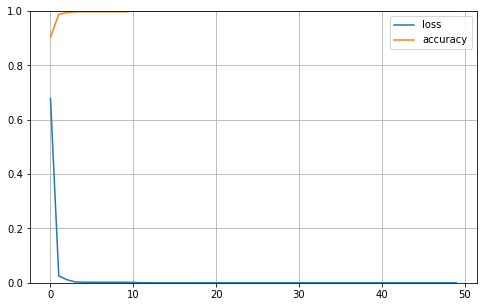

In [9]:
import pandas as pd
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [10]:
from sklearn.metrics import accuracy_score

y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1.0


In [11]:
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

0.9670510708401977


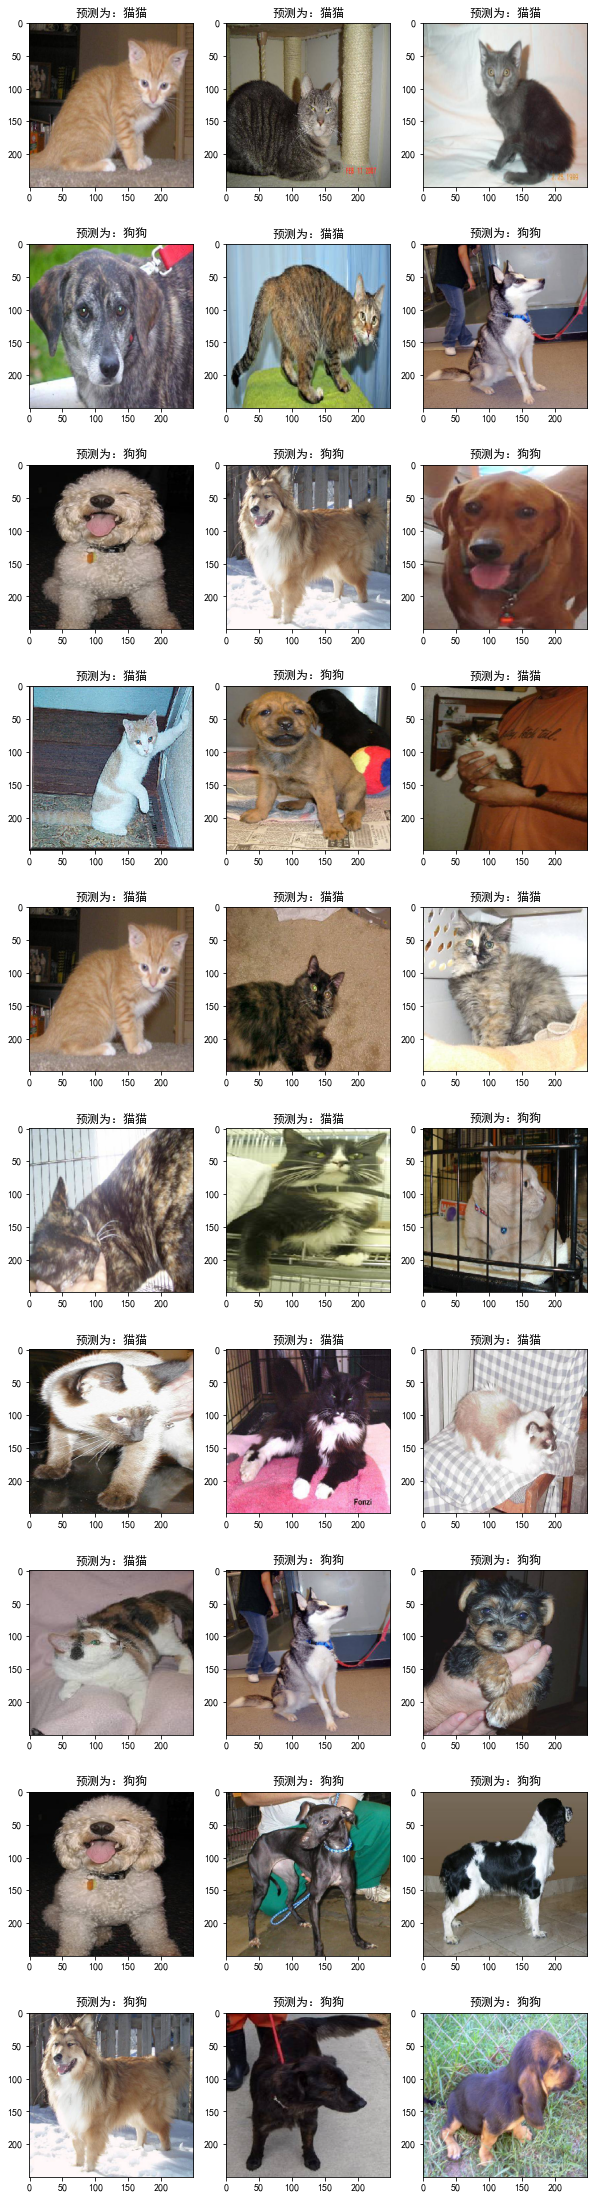

In [12]:
import matplotlib as mlp
font2 = {'family': 'SimHei',
         'weight': 'normal',
         'size': 20}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False

from matplotlib.image import imread
from tensorflow.keras.models import load_model

a = [i for i in range(1, 31)]
fig = plt.figure(figsize=(10, 40))

for i in a:
    img_name = 'D:/project/dataset/cat_and_dog/' + str(i) + '.jpg'
    img_ori = load_img(img_name, target_size=(224, 224))
    img = img_to_array(img_ori)
    x =np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    features = model_vgg.predict(x)
    features = features.reshape(1, 7*7*512)
    result = model.predict_classes(features)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(10, 3, i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫猫')
    
plt.show()